# House Price Prediction with Advanced Regression

   The Data source is provided as a .csv file and data definitions are provided in the .txt file.
   they are attached to the repository.

# Data Understanding and Exploration

In [1]:
#import all the essential libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
# Identifying the shape of the data available
df.shape

(1460, 81)

In [4]:
# Getting the head of the data to see how the parameters are arranged 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## checking data types of the variables
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Handling Missing Data/ Data Cleaning

In [7]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
#check missing percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64

In [9]:
# We have to drop first 5 columns which contains large number of null values
df.drop(['Id', 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [10]:
#checking missng values again
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(30)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
dtype: float64

In [11]:
#Checking the summary
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#We will go ahead and drop these columns as they are dominated by one value and won't add any extra information to our model
df=df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [13]:
#Checking the summary
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


In [14]:
## From the data description NA can be replaced by No garage 
df['GarageType'] = df['GarageType'].replace(np.NaN, 'NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.NaN, 0.0)
df['GarageFinish'] = df['GarageFinish'].replace(np.NaN, 'NoGarage')
df['GarageCond'] = df['GarageCond'].replace(np.NaN, 'NoGarage')
df['GarageQual'] = df['GarageQual'].replace(np.NaN, 'NoGarage')

In [15]:
## checking null values again
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

LotFrontage      17.74
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
FullBath          0.00
TotRmsAbvGrd      0.00
BsmtHalfBath      0.00
BsmtFullBath      0.00
GrLivArea         0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
LowQualFinSF      0.00
2ndFlrSF          0.00
KitchenQual       0.00
MSSubClass        0.00
Functional        0.00
Fireplaces        0.00
GarageType        0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
ScreenPorch       0.00
EnclosedPorch     0.00
OpenPorchSF       0.00
WoodDeckSF        0.00
PavedDrive        0.00
GarageCond        0.00
GarageQual        0.00
GarageArea        0.00
GarageCars        0.00
GarageFinish      0.00
GarageYrBlt       0.00
1stFlrSF          0.00
TotalBsmtSF       0.00
CentralAir        0.00
OverallCond       0.00
LotArea    

In [16]:
## similarly for basement columns replace with NoBasement
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.NaN, 'NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.NaN, 'NoBasement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.NaN, 'NoBasement')
df['BsmtCond'] = df['BsmtCond'].replace(np.NaN, 'NoBasement')
df['BsmtQual'] = df['BsmtQual'].replace(np.NaN, 'NoBasement')

In [17]:
#Lotfrontage has approx 17% data missing and as the box plot shows it also has outlier hence imoputing using median instead of mean
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 

In [18]:
## checking null values again
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
MSSubClass       0.00
FullBath         0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
BsmtHalfBath     0.00
Functional       0.00
BsmtFullBath     0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
CentralAir       0.00
TotRmsAbvGrd     0.00
Fireplaces       0.00
Heating          0.00
GarageType       0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
ScreenPorch      0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
GarageCars       0.00
GarageFinish     0.00
GarageYrBlt      0.00
HeatingQC        0.00
TotalBsmtSF      0.00
MSZoning         0.00
LandSlope        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborho

In [19]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.NaN, 0.0)
df['MasVnrType'] = df['MasVnrType'].replace(np.NaN, 'None')

In [20]:
#again checking for null values
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

Electrical       0.07
MSSubClass       0.00
BsmtHalfBath     0.00
TotRmsAbvGrd     0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtFullBath     0.00
MSZoning         0.00
GrLivArea        0.00
LowQualFinSF     0.00
2ndFlrSF         0.00
1stFlrSF         0.00
CentralAir       0.00
HeatingQC        0.00
Functional       0.00
Fireplaces       0.00
GarageType       0.00
OpenPorchSF      0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
ScreenPorch      0.00
EnclosedPorch    0.00
WoodDeckSF       0.00
GarageYrBlt      0.00
PavedDrive       0.00
GarageCond       0.00
GarageQual       0.00
GarageArea       0.00
GarageCars       0.00
GarageFinish     0.00
Heating          0.00
TotalBsmtSF      0.00
BsmtUnfSF        0.00
LandSlope        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LotConfig 

#### Null Values have been eliminated

In [21]:
#check for duplicates if any
df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [22]:
#checking the summary of the data
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


In [23]:
#Checking the shape of the dataframe
df.shape

(1460, 72)

# Exploratory Data Analysis and Visualization

<Figure size 432x288 with 0 Axes>

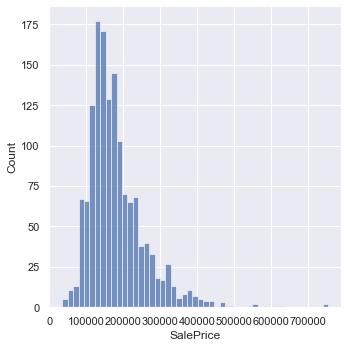

In [24]:
#Checking Sale Column
plt.figure()
sns.displot(df['SalePrice'],color='b')
plt.show()

In [25]:
#identifying numeric variables
df.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [26]:
#Using IQR to remove outliers
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']
Q1=df[cols].quantile(0.05)
Q3=df[cols].quantile(0.95)
IQR=Q3-Q1
df=df[~((df[cols] < ( Q1 - 1.5 * IQR )) | (df[cols] > ( Q3 + 1.5 * IQR))).any(axis=1)]

<Figure size 432x288 with 0 Axes>

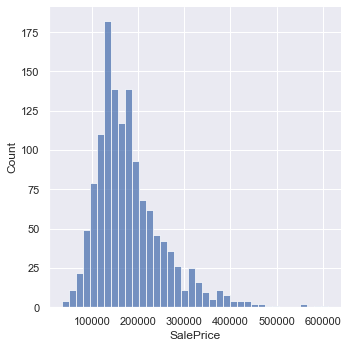

In [27]:
#Sale Column
plt.figure()
sns.displot(df['SalePrice'],color='b')
plt.show()

In [28]:
#Checking info after outlier treatment
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

In [29]:
# Convert year related columns to number of years, to find how old the house is, or how many years ago that particular
# house was sold.
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']
df.shape

(1333, 72)

In [30]:
## identifying numeric variables
numeric = df.select_dtypes(include=['float64','int64'])
numeric = numeric.columns

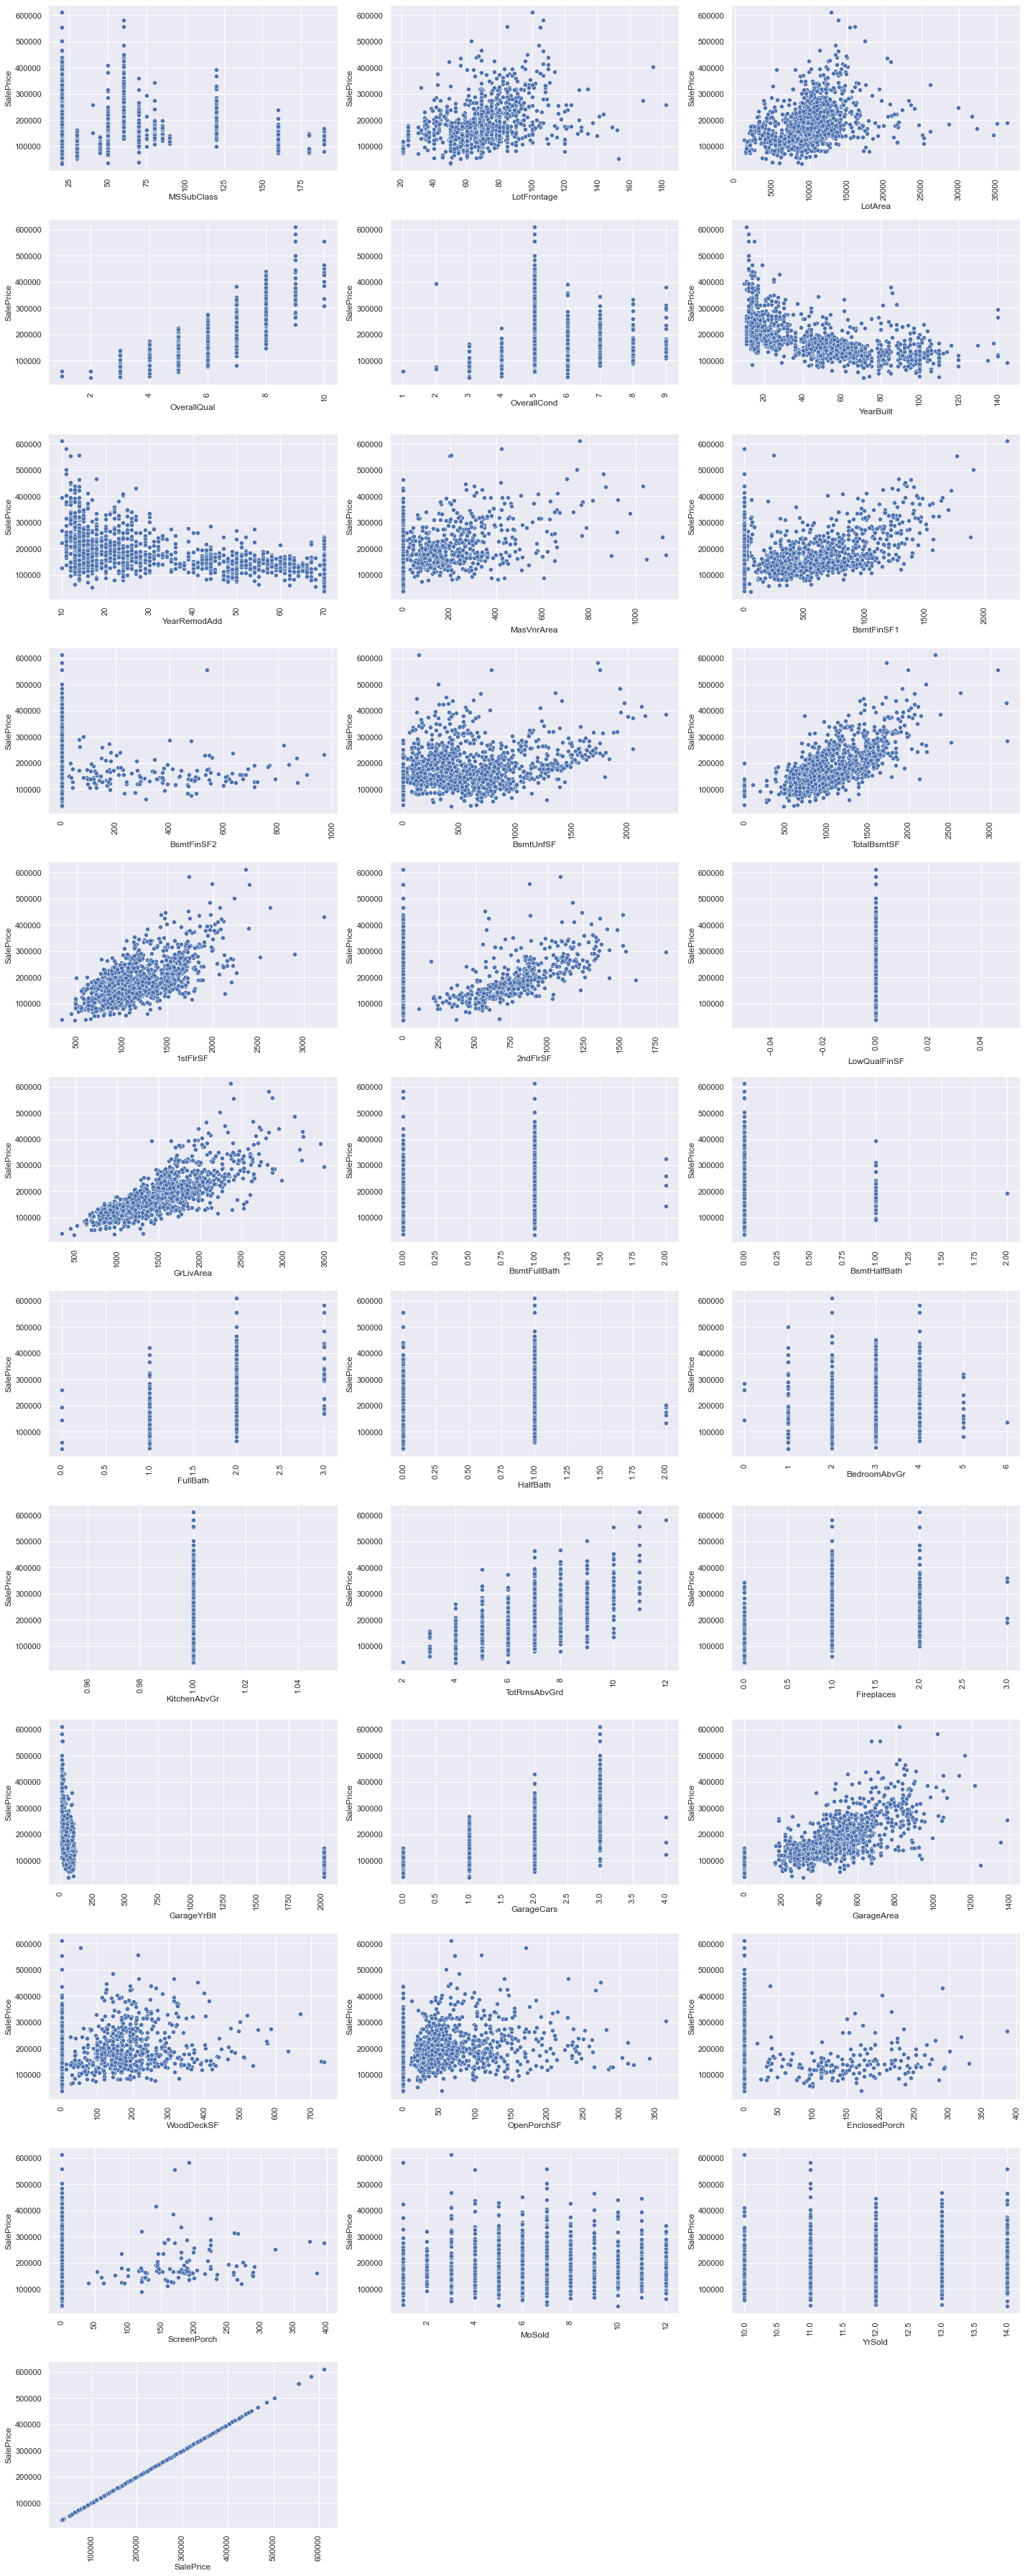

In [31]:
## making pairplots to identify trends 
plt.figure(figsize = (20,50))
i = 1
for x in numeric :
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=df)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

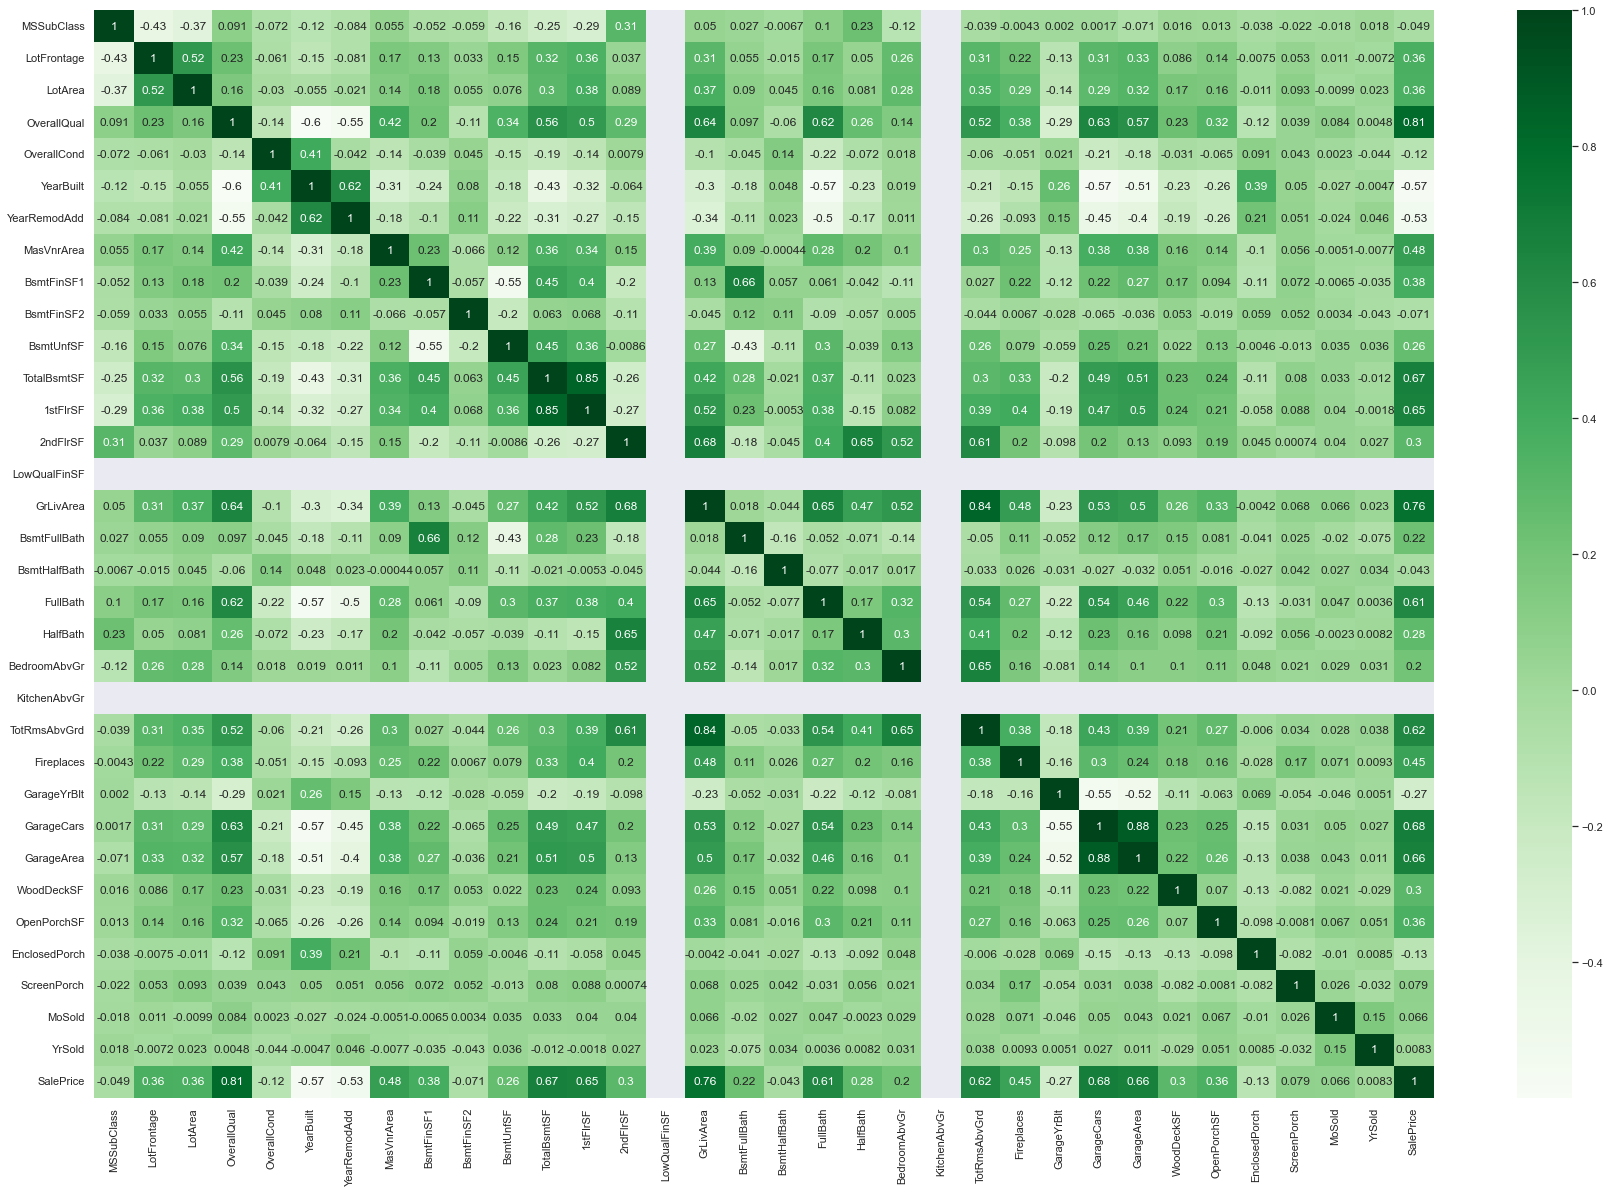

In [32]:
## finding out correlation between variable and correlation wrt to target variable
plt.figure(figsize = (30, 20))
sns.heatmap(df[numeric].corr(),cmap="Greens", annot = True)
plt.show()

* Variables that are highly correlated with Sale Price are : OverallQual,GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt
* GarageArea and GarageCars are highly correlated with a correlation of 0.88
* TotRmsAbvGrd and GrLivArea are correlated to each other with a correlation of 0.83
* 1stFlrSF and TotalBsmtSF are highly correlated with a correlation of 0.82

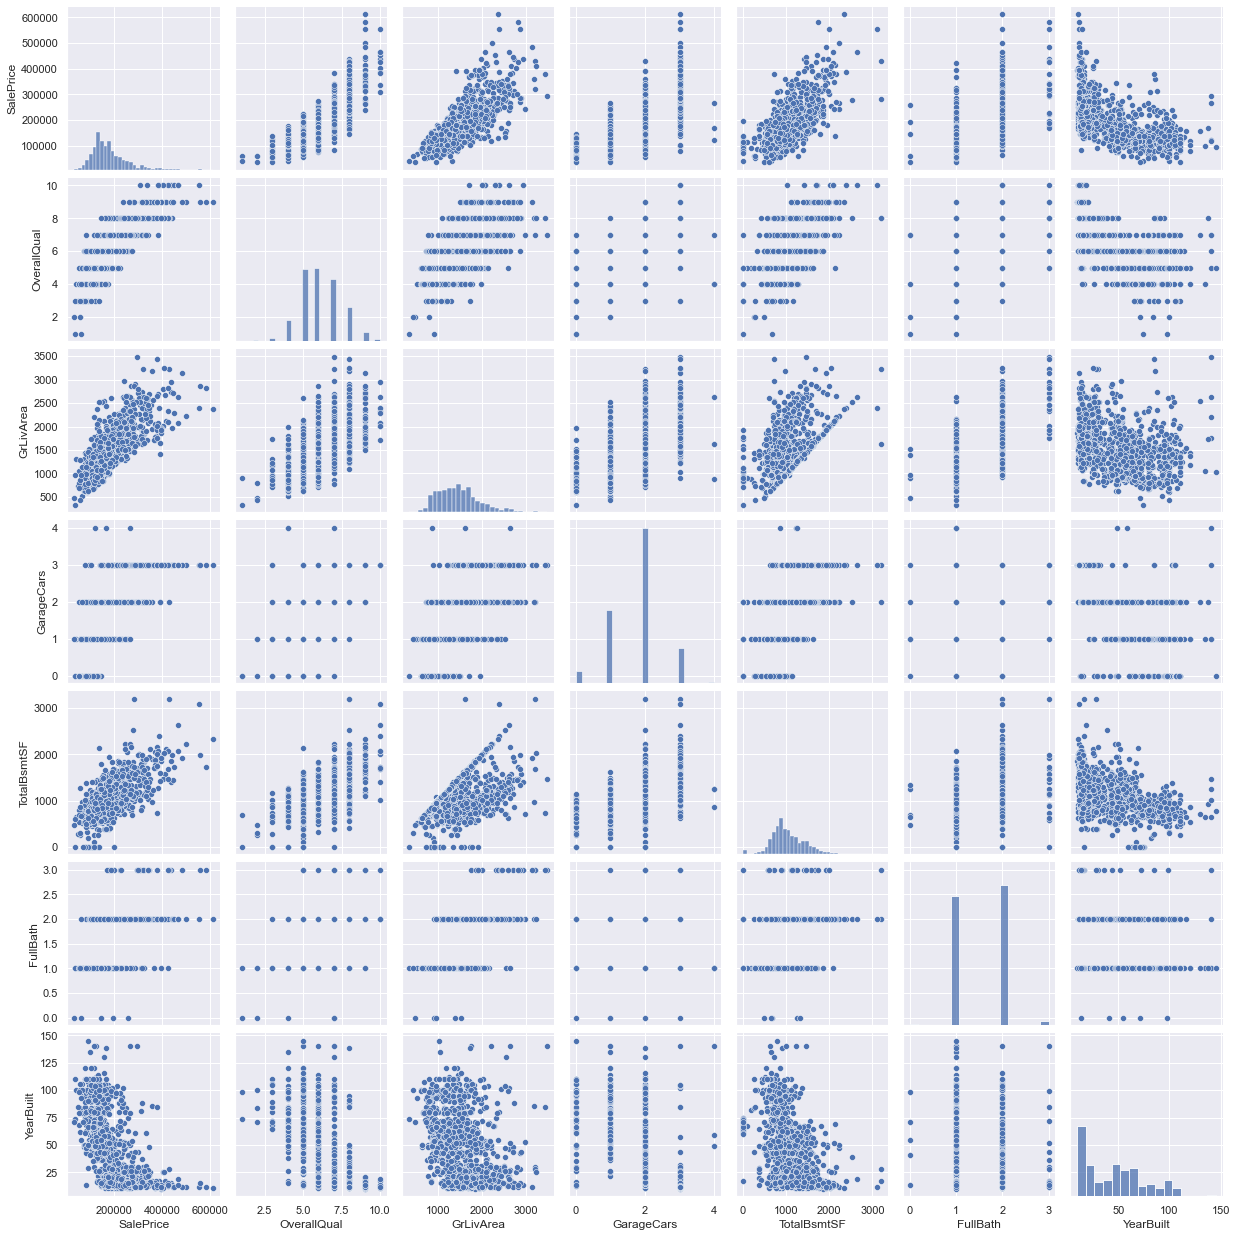

In [33]:
columns=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[columns])
plt.show()

* Visualizing categorical variables

In [34]:
##identifying categorical variables
categorical = df.select_dtypes(include=['object'])
categorical = categorical.columns
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

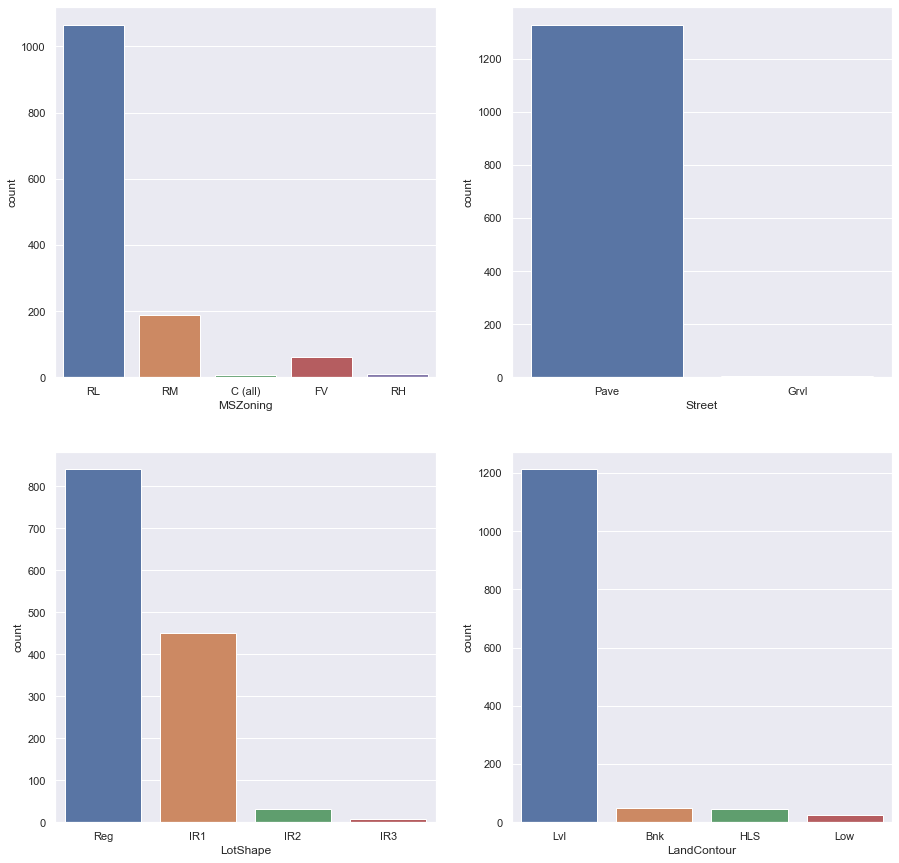

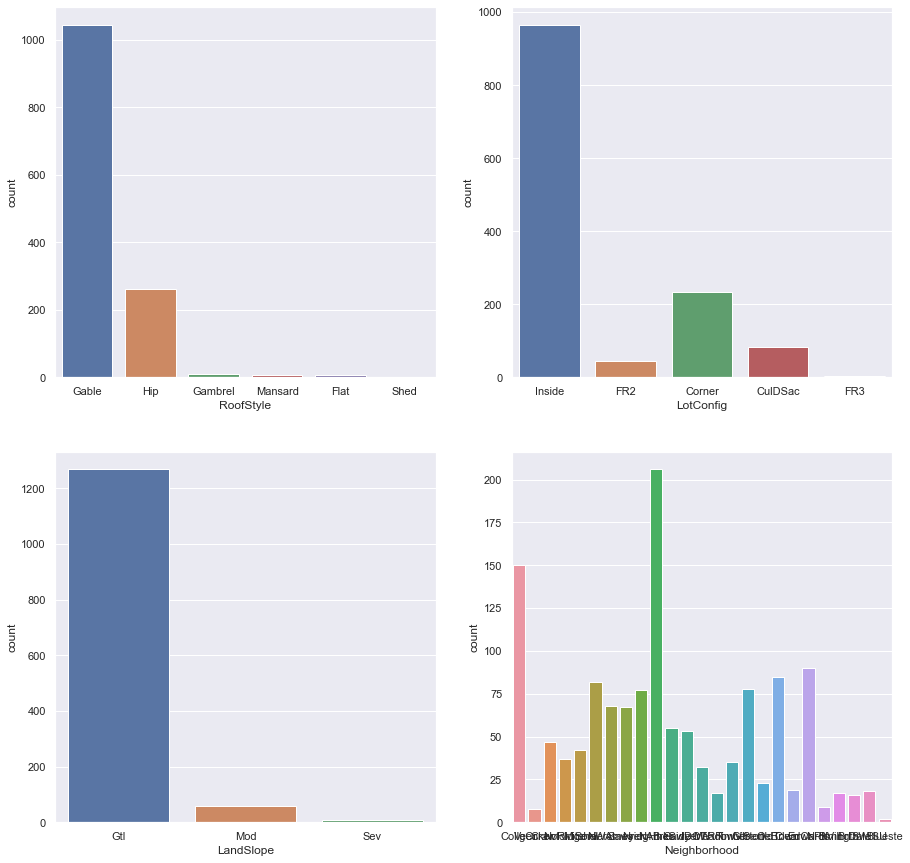

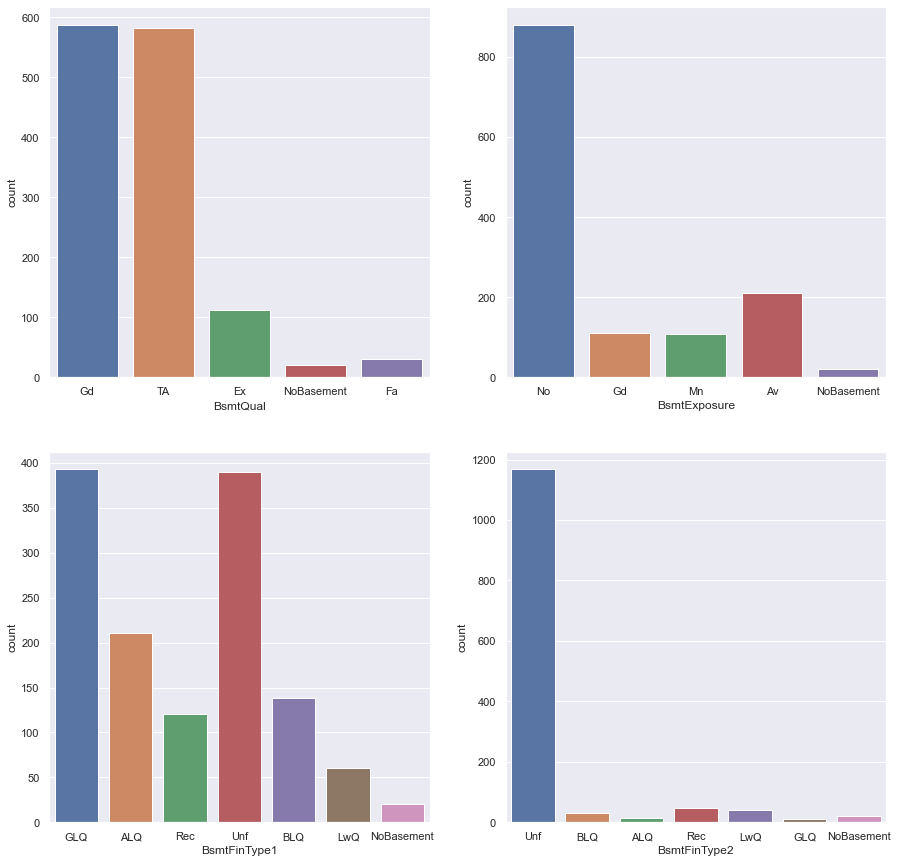

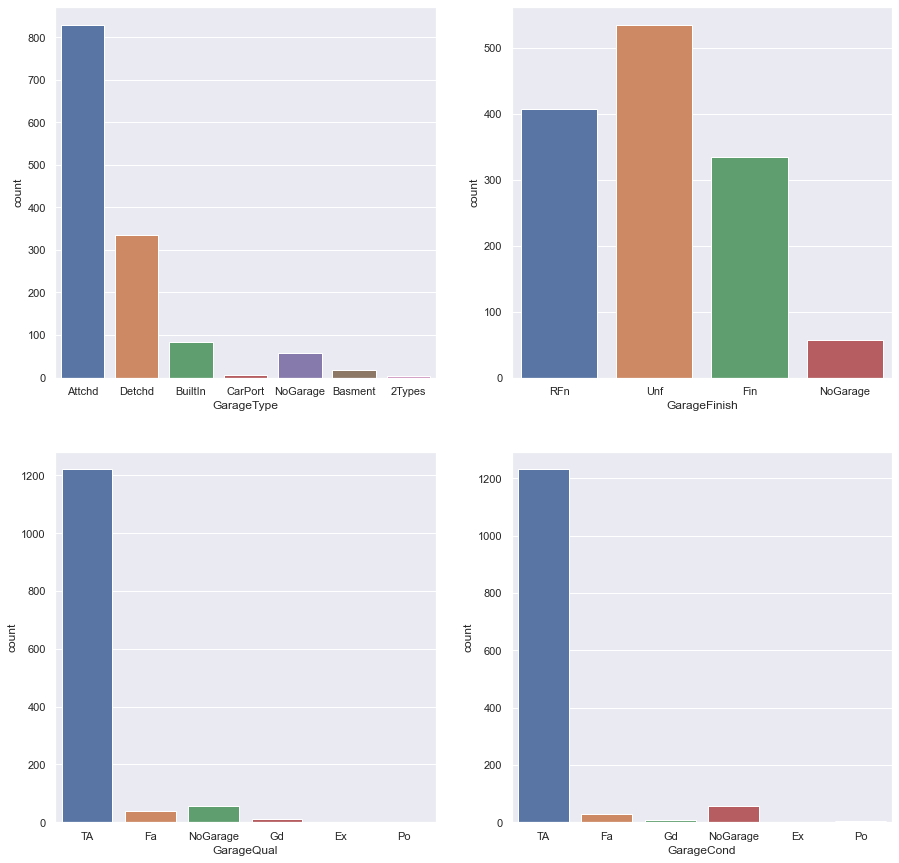

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='MSZoning', data=df)
plt.subplot(222)
sns.countplot(x='Street', data=df)
plt.subplot(223)
sns.countplot(x='LotShape', data=df)
plt.subplot(224)
sns.countplot(x='LandContour', data=df)

plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='RoofStyle', data=df)
plt.subplot(222)
sns.countplot(x='LotConfig', data=df)
plt.subplot(223)
sns.countplot(x='LandSlope', data=df)
plt.subplot(224)
sns.countplot(x='Neighborhood', data=df)

plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='BsmtQual', data=df)
plt.subplot(222)
sns.countplot(x='BsmtExposure', data=df)
plt.subplot(223)
sns.countplot(x='BsmtFinType1', data=df)
plt.subplot(224)
sns.countplot(x= 'BsmtFinType2', data=df)

plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='GarageType', data=df)
plt.subplot(222)
sns.countplot(x='GarageFinish', data=df)
plt.subplot(223)
sns.countplot(x='GarageQual', data=df)
plt.subplot(224)
sns.countplot(x='GarageCond', data=df)

# Data Preparation
- Here We will do encoding of variables (dummy variables)
- We will be Splitting the data into train and test sets
- We will then do feature scaling

In [36]:
y=df.pop('SalePrice')
X=df

In [37]:
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [38]:
## creating dummy variables for categorical variables
housing_dum = pd.get_dummies(housing_cat, drop_first=True)
housing_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,

In [39]:
X = pd.concat([X, housing_dum], axis=1)
X.shape

(1333, 268)

In [40]:
X = X.drop(categorical, axis = 1)
X.shape

(1333, 230)

### Splitting the data into Training data and Testing Data

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1118,80,85.0,13825,5,6,62,33,0.0,0,0,533,533,1021,580,0,1601,0,1,1,0,3,1,6,0,62.0,1,300,280,34,0,0,12,12,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [42]:
y_train.head()

1118    140000
64      219500
735     163000
373     123000
466     167000
Name: SalePrice, dtype: int64

### Feature Scaling

In [43]:
#Checking which columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [44]:
num_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1118,80,85.0,13825,5,6,62,33,0.0,0,0,0,0,0,0,1,0,0,0,1,0
64,60,69.0,9375,7,5,23,22,573.0,739,0,0,0,0,0,1,0,0,0,1,0
735,75,60.0,10800,7,7,106,50,0.0,390,0,0,0,0,0,1,0,0,0,1,0
373,20,79.0,10634,5,6,67,67,0.0,428,180,0,0,0,0,1,0,0,0,1,0
466,20,85.0,10628,7,5,50,50,0.0,778,0,0,0,0,0,1,0,0,0,1,0


In [45]:
#Scaling using MinMax
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [46]:
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.

In [47]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.00000,400.0

In [48]:
X_train.shape

(933, 230)

# Model Building

### RFE Model

In [49]:
#Importing Linear Regression Function from scikit learn for its compatibility with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
#Running RFE with ouput number of variables=10
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,25)
rfe=rfe.fit(X_train,y_train)
#Finding the top ranked features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 9),
 ('LotFrontage', False, 109),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 170),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 18),
 ('BsmtUnfSF', False, 194),
 ('TotalBsmtSF', False, 189),
 ('1stFlrSF', False, 197),
 ('2ndFlrSF', False, 190),
 ('LowQualFinSF', False, 200),
 ('GrLivArea', False, 185),
 ('BsmtFullBath', False, 179),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 44),
 ('HalfBath', False, 89),
 ('BedroomAbvGr', False, 123),
 ('KitchenAbvGr', False, 201),
 ('TotRmsAbvGrd', False, 41),
 ('Fireplaces', False, 102),
 ('GarageYrBlt', False, 184),
 ('GarageCars', False, 22),
 ('GarageArea', False, 199),
 ('WoodDeckSF', False, 198),
 ('OpenPorchSF', False, 195),
 ('EnclosedPorch', False, 193),
 ('ScreenPorch', False, 187),
 ('MoSold', False, 182),
 ('YrSold', False, 186),
 ('MSZoning_FV', False, 11),
 ('MSZoning_RH', False, 38),
 ('MSZo

In [51]:
#Print the coefficients and intercepts
lm1=lm.fit(X_train,y_train)
print(lm1.intercept_)


-126655.04128036095


In [52]:
print(lm1.coef_)

[-1.92311728e+04  3.89838258e+03  3.35272850e+04  5.10280576e+04
  4.07457580e+04 -2.68959747e+04 -3.84850547e+03  1.51699970e+04
  1.04369143e+02 -2.51983908e+02 -1.62556021e+01  4.60141155e+01
  8.09355422e+00  2.42136767e+01 -5.34982973e-08  3.23072344e+01
  1.40108484e+03 -1.87888178e+03  6.06024453e+03  2.16190785e+03
 -4.50538007e+03 -6.94853952e-10  2.37705251e+03  1.58979664e+03
 -6.01625715e+01  7.10969194e+03  1.91904750e+00  7.41901374e+00
  1.72319966e+01  1.98198567e+01  3.97735388e+01 -2.79497005e+02
  2.15039510e+02  6.24026661e+04  5.10001143e+04  4.72660889e+04
  4.15539866e+04  1.41959501e+04  5.70313789e+02  9.71797166e+03
  2.80787420e+02  2.57009144e+03 -1.28620423e+04  2.98767383e+02
 -3.46779268e+04  5.45699322e+03 -4.68635110e+03 -9.92468823e+03
  2.72633539e+02  2.61209501e+02 -1.72214573e+04  1.62831617e+04
  9.57173636e+03  5.47735585e+02 -6.88472174e+03 -1.11650635e+04
  1.11698259e+04 -1.97336913e+04 -1.53405820e+04 -1.06297540e+04
  1.96554046e+03 -1.81999

In [53]:
#Importing libraries for model evaluation
from sklearn.metrics import r2_score,mean_squared_error
#Calculating r2score,RSS,RMSE
y_pred_train=rfe.predict(X_train)
y_pred_test=rfe.predict(X_test)

In [54]:
print("Linear Regression Scores")
print("====================================================================")
print('R2 score Linear Regression (train) : ',r2_score(y_train,y_pred_train))
print('R2 score Linear Regression (test) : ' ,r2_score(y_test,y_pred_test))
print("=======================================================================")
print('RSS Linear Regression (train) : ',np.sum(np.square(y_train-y_pred_train)))
print('RSS Linear Regression (test) : ' ,np.sum(np.square(y_test-y_pred_test)))
print("=======================================================================")
print('MSE Linear Regression (train) : ',mean_squared_error(y_train,y_pred_train))
print('MSE Linear Regression (test) : ' ,mean_squared_error(y_test, y_pred_test))

Linear Regression Scores
R2 score Linear Regression (train) :  0.8324815524014063
R2 score Linear Regression (test) :  0.8181997954785196
RSS Linear Regression (train) :  852355668213.2971
RSS Linear Regression (test) :  444684187592.968
MSE Linear Regression (train) :  913564488.974595
MSE Linear Regression (test) :  1111710468.98242


###  Ridge Model

In [55]:
#Importing Libraries
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [56]:

#Defining a list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
-15322.383068252713


In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=3]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012428,0.001616,0.005264,0.000974,0.0001,{'alpha': 0.0001},-16860.123583,-16746.169929,-16939.502047,-15415.033548,-17411.701752,-16674.506172,669.259433,24,-11505.736686,-11196.374920,-11631.206499,-11315.272630,-10907.718733,-11311.261893,251.494406
1,0.011770,0.000949,0.005029,0.000074,0.001,{'alpha': 0.001},-16835.295738,-16735.323155,-16902.308279,-15411.714032,-17403.203015,-16657.568844,664.176859,23,-11507.857683,-11197.585994,-11633.204550,-11316.005158,-10907.835065,-11312.497690,252.185351
2,0.011239,0.000635,0.005515,0.000447,0.01,{'alpha': 0.01},-16669.657145,-16646.278808,-16622.698188,-15381.623131,-17326.712360,-16529.393927,631.686000,22,-11523.781322,-11209.955832,-11651.888272,-11323.907802,-10909.797444,-11323.866134,257.679275
3,0.011571,0.001059,0.004788,0.000780,0.05,{'alpha': 0.05},-16573.025256,-16450.545486,-16055.129754,-15299.112813,-17106.630980,-16296.888858,601.589308,21,-11571.296198,-11258.480356,-11731.770354,-11354.221914,-10940.578277,-11371.269420,271.469514
4,0.010508,0.000848,0.004174,0.000811,0.1,{'alpha': 0.1},-16519.611015,-16327.674376,-15735.150400,-15234.009208,-16960.449752,-16155.378950,605.970947,19,-11612.319530,-11298.691565,-11798.610474,-11383.163921,-10979.976608,-11414.552420,279.240947


In [59]:
# Ridge regression:
ridge = Ridge(alpha=3)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.06069615e+04,  8.35240973e+03,  1.61792011e+04,  3.72415072e+04,
        2.93149115e+04, -1.43415778e+04, -7.16378046e+03,  1.36753980e+04,
        2.21354564e+03, -5.34566978e+03, -1.51867104e+01,  4.58611761e+01,
        1.07094510e+01,  2.30401968e+01,  0.00000000e+00,  3.37496517e+01,
        5.60423470e+02, -3.06311827e+03,  5.16690379e+03,  2.47180434e+03,
       -5.12683731e+03,  0.00000000e+00,  2.99636564e+03,  1.97976854e+03,
        1.46048843e+00,  6.55681637e+03,  5.09196039e+00,  9.42155232e+00,
        1.52218060e+01,  1.17368716e+01,  2.92838375e+01, -2.23836067e+02,
       -1.24547805e+02,  1.45929703e+04,  5.83743518e+03,  6.40154285e+03,
        1.34570819e+03,  1.40508535e+04,  2.01683711e+03,  5.42435130e+03,
       -7.20655731e+02,  5.05965595e+03, -6.21909650e+03, -1.25126772e+02,
       -4.61876995e+03,  4.69029982e+03, -3.61684313e+03, -5.22904719e+03,
       -2.82277616e+02, -1.90982037e+03, -6.05940886e+03,  2.86343075e+03,
        7.11034547e+03,  

In [60]:
# predict
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
ridge_model = []
r2_train = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
ridge_model.append(r2_train)
r2_test =  r2_score(y_test, y_pred_test)
ridge_model.append(r2_test)

Ridge(alpha=3)  Regression
R2 score (train) :  0.9393584980659788
R2 score (test) :  0.9170387823080166


In [61]:
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(10)

,Features,Coefficients
4,OverallCond,37241.507214
5,YearBuilt,29314.911538
73,Neighborhood_Timber,28627.817833
66,Neighborhood_NridgHt,20391.384118
158,BsmtExposure_Mn,19965.335663
196,GarageType_Attchd,18356.661484
3,OverallQual,16179.201072
137,ExterQual_Fa,15240.475137
34,MSZoning_RH,14592.970334
67,Neighborhood_OldTown,14540.084288


### Lasso Model

In [62]:
lasso=Lasso()
folds = 5
#Doing cross-validation
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='neg_mean_absolute_error',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-15138.378256938424


In [64]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-1.13791965e+04,  4.36266634e+03,  2.04329005e+04,  5.27117364e+04,
        3.35156749e+04, -1.96551948e+04, -6.41235685e+03,  1.24016215e+04,
        0.00000000e+00, -5.04693252e+03, -1.54375008e+01,  4.30586758e+01,
        3.70651648e+01,  4.50795591e+01,  0.00000000e+00,  7.96704000e+00,
        4.10629647e+02, -2.61638876e+03,  3.93914382e+03,  1.55559217e+03,
       -4.64404970e+03,  0.00000000e+00,  3.08213880e+03,  2.17116763e+03,
        5.33976817e+00,  6.19845800e+03,  8.51611386e+00,  8.51742311e+00,
        1.51810497e+01,  7.54877324e+00,  2.71198680e+01, -1.90320355e+02,
       -5.87700476e+01,  1.50234290e+04,  0.00000000e+00,  4.64746943e+03,
       -7.49763894e+00,  1.80602898e+04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.65922255e+03, -1.88857062e+03,  0.00000000e+00,
       -0.00000000e+00,  4.78039703e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.57924868e+03,  

In [65]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=50)  Regression
R2 score (train) :  0.9369069139272894
R2 score (test) :  0.918395595610946


In [66]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_test.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(10)

,Coeff Values,Variables,Absolute Coefficent
3,52711.736438,OverallQual,52711.736438
4,33515.674903,OverallCond,33515.674903
72,32894.257471,Neighborhood_StoneBr,32894.257471
65,25370.498373,Neighborhood_NoRidge,25370.498373
138,-21386.394320,ExterQual_Gd,21386.394320
139,-20671.300827,ExterQual_TA,20671.300827
2,20432.900534,LotArea,20432.900534
188,-20228.831341,KitchenQual_Gd,20228.831341
189,-19985.514375,KitchenQual_TA,19985.514375
5,-19655.194810,YearBuilt,19655.194810


# Model Evaluation

In [67]:
# predict
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge(alpha=3)  Regression
R2 score (train) :  0.9393584980659788
R2 score (test) :  0.9170387823080166


In [68]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=50)  Regression
R2 score (train) :  0.9369069139272894
R2 score (test) :  0.918395595610946


#### Selecting Lasso as the R2 test score of Lasso is better than Ridge.

In [69]:
print('\033[1mTop 10 features:\033[1m')
lasso_df.head(10)

Top 10 features:


,Coeff Values,Variables,Absolute Coefficent
3,52711.736438,OverallQual,52711.736438
4,33515.674903,OverallCond,33515.674903
72,32894.257471,Neighborhood_StoneBr,32894.257471
65,25370.498373,Neighborhood_NoRidge,25370.498373
138,-21386.394320,ExterQual_Gd,21386.394320
139,-20671.300827,ExterQual_TA,20671.300827
2,20432.900534,LotArea,20432.900534
188,-20228.831341,KitchenQual_Gd,20228.831341
189,-19985.514375,KitchenQual_TA,19985.514375
5,-19655.194810,YearBuilt,19655.194810


#### Question 1
**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**


**Ridge(alpha=3)  Regression**<br>
R2 score (train) :  0.9393584980659788<br>
R2 score (test) :  0.9170387823080166<br>

**Lasso(alpha=50)  Regression**<br>
R2 score (train) :  0.9369069139272894<br>
R2 score (test) :  0.918395595610946<br>

In [70]:
#Doubling the Alpha for ridge
alpha=6
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=6)

In [71]:
y_train_pred = ridge.predict(X_train)
print(ridge," Regression")
print("===================================")
print('R2 score (train) : ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score (test) : ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Ridge(alpha=6)  Regression
R2 score (train) :  0.9361704060931698
R2 score (test) :  0.9157545719608025


In [72]:
#Doubling the Alpha for lasso
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-1.01679404e+04,  3.12581384e+03,  1.14912293e+04,  5.22534466e+04,
        2.95593711e+04, -1.70321012e+04, -7.08881388e+03,  9.04546673e+03,
        0.00000000e+00, -6.03281143e+03, -1.60112435e+01,  4.47342401e+01,
        3.92513228e+01,  4.61960798e+01,  0.00000000e+00,  8.19978322e+00,
        0.00000000e+00, -1.75715153e+03,  2.67679306e+03,  1.30540006e+03,
       -4.65502869e+03,  0.00000000e+00,  3.24022174e+03,  2.10519281e+03,
        5.97374573e+00,  6.02262026e+03,  1.24479168e+01,  9.30012220e+00,
        1.68822170e+01,  2.62292015e+00,  2.40831007e+01, -1.17019171e+02,
       -8.75049285e+01,  1.31494407e+04,  0.00000000e+00,  3.78030206e+03,
       -2.42342463e+03,  3.77024784e+03,  0.00000000e+00,  0.00000000e+00,
       -5.71290042e+02,  9.98962511e+02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.07965343e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [73]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train, y_train)

print(lasso," Regression")
print("===================================")
y_train_pred = lasso.predict(X_train)
print('R2 score (train) : ',model_lasso.score(X_train, y_train))
print('R2 score (test) : ',model_lasso.score(X_test,y_test))

Lasso(alpha=100)  Regression
R2 score (train) :  0.9319360472310817
R2 score (test) :  0.9178871689477476


Observations after doubling the value of Alpha:<br>
R2 score reduced for the training and test data when doubling the alpha

The top 10 predictor variables are:

OverallQual<br>
OverallCond<br>
Neighborhood_StoneBr<br>
Neighborhood_NoRidge<br>
ExterQual_Gd<br>
ExterQual_TA<br>
LotArea<br>
KitchenQual_Gd<br>
KitchenQual_TA<br> 
YearBuilt<br>

#### Question 2
**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**


Based on the R2scores we can choose **Lasso**, As the R2score is slightly high.

#### Question 3
**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [74]:
X_train_new=X_train.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test_new = X_test.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [75]:
# Building Lasso Model with the new dataset
lasso_new = Lasso(alpha=50)
lasso_new.fit(X_train_new,y_train)
lasso_new_coef = lasso_new.coef_
y_test_pred_new = lasso_new.predict(X_test_new)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso_new_coeff = pd.DataFrame(np.atleast_2d(lasso_new_coef),columns=X_train_new.columns)
lasso_new_coeff = lasso_new_coeff.T
lasso_new_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso_new_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_new_coeff.head(5)

The R2 Score of the model on the test dataset is 0.9157545719608025
The MSE of the model on the test dataset is 515161820.4258684
The most important predictor variables are as follows:


,Lasso Co-Efficient
Neighborhood_StoneBr,41573.636132
OverallCond,31232.172858
Neighborhood_NoRidge,26883.981639
BsmtExposure_Gd,24770.238090
Neighborhood_NridgHt,22658.436350


#### Question 4
**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

The most common rules to make a model robust and generalisable are:<br>
1. Outlier Analysis is a must and we need to ensure that retain only those values which are relevant to the dataset<br>
2. The model should be as simple as possible the more complex the model the more probability that it will overfit<br>

If the above is not performed correctly there is a possiblity that the accuracy will decrease on the test set due to<br> overfitting or underfitting.<br>

The above can analyzed using the Bias-Varience tradeoff:<br>
**Bias** is a phenomenon that skews the result of an algorithm in favor or against an idea.<br>
**Variance** refers to the changes in the model when using different portions of the training data set.<br>
Bias and variance are inversely related, we must find a fine line between this to make our model robust and generalisable<br>